# Atividade 01

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
%%time
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from prettytable import PrettyTable

CPU times: total: 578 ms
Wall time: 5.88 s


In [2]:
%%time

# Carregar dados de treinamento
features_train = pd.read_csv('features.txt', sep='?', header=None).squeeze()
X_train = pd.read_csv('X_train.txt', header=None, names=features_train, delim_whitespace=True)
subject_train = pd.read_csv('subject_train.txt', header=None)

# Carregar dados de teste
X_test = pd.read_csv('X_test.txt', header=None, names=features_train, delim_whitespace=True)
subject_test = pd.read_csv('subject_test.txt', header=None)

# Carregar rótulos para dados de treinamento e teste
y_train = pd.read_csv('y_train.txt', header=None).squeeze()
y_test = pd.read_csv('y_test.txt', header=None).squeeze()

# Salvar os três primeiros atributos em CSV
X_train.iloc[:, :3].to_csv('./output/X_train.csv', index=False)
X_test.iloc[:, :3].to_csv('./output/X_test.csv', index=False)

# Selecionar apenas os três primeiros atributos
X_train = X_train.iloc[:, :3]
X_test = X_test.iloc[:, :3]

CPU times: total: 1.92 s
Wall time: 3.03 s


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [3]:
%%time

# Ajustar uma árvore de decisão com parâmetros especificados
tree_model = DecisionTreeClassifier(min_samples_leaf=20, max_depth=10, min_samples_split=2, random_state=42)
tree_model.fit(X_train, y_train)

# Calcular ccp_alphas
ccp_alphas = tree_model.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']

# Selecionar ccp_alphas de forma espaçada
selected_ccp_alphas = ccp_alphas[::5]

CPU times: total: 46.9 ms
Wall time: 52.5 ms


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

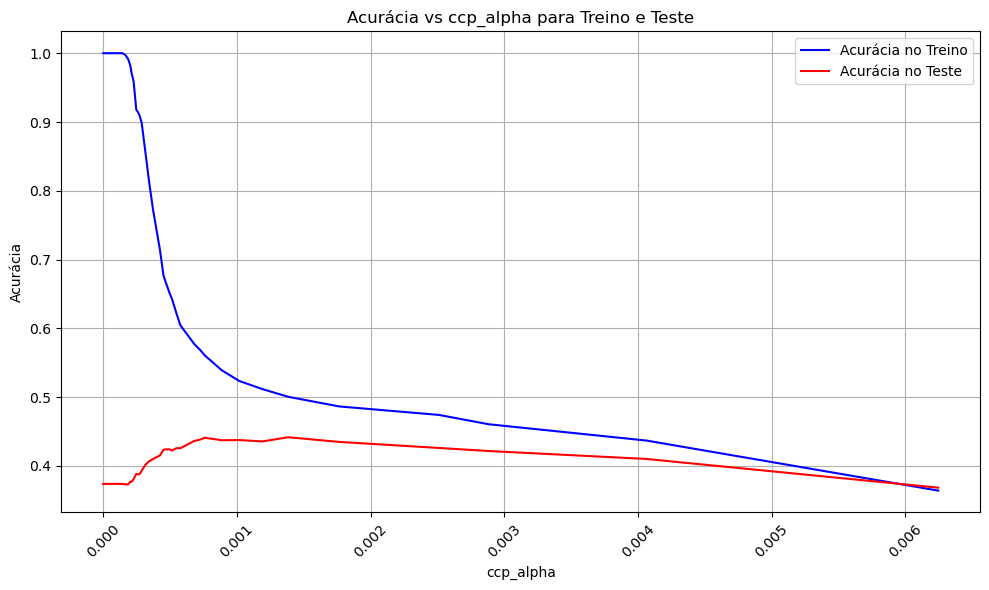

Melhor acurácia com as três variáveis: 0.4418
CPU times: total: 750 ms
Wall time: 1.02 s


In [22]:
%%time
# Execução de uma árvore para cada valor de ccp_alpha, salvando cada árvore em uma lista
modelos_arvore = [DecisionTreeClassifier(ccp_alpha=alpha, random_state=42).fit(X_train, y_train) for alpha in selected_ccp_alphas]

# Cálculo das acurácias para os conjuntos de treino e teste
acuracias_treino = [accuracy_score(y_train, modelo.predict(X_train)) for modelo in modelos_arvore]
acuracias_teste = [accuracy_score(y_test, modelo.predict(X_test)) for modelo in modelos_arvore]

# Plotagem das acurácias em relação aos valores de ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(selected_ccp_alphas, acuracias_treino, label='Acurácia no Treino', linestyle='-', color='b')
plt.plot(selected_ccp_alphas, acuracias_teste, label='Acurácia no Teste', linestyle='-', color='r')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs ccp_alpha para Treino e Teste')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Seleção da melhor árvore com base na acurácia no conjunto de teste
indice_melhor_arvore = np.argmax(acuracias_teste)
melhor_arvore = modelos_arvore[indice_melhor_arvore]
melhor_ccp_alpha = selected_ccp_alphas[indice_melhor_arvore]

# Impressão da melhor acurácia
melhor_acuracia_teste = acuracias_teste[indice_melhor_arvore]
print(f'Melhor acurácia com as três variáveis: {melhor_acuracia_teste:.4f}')

# Atividade 02

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [5]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import os

# Configurando a exibição
%matplotlib inline

In [6]:
%%time

# Carregando conjuntos de treino e teste
X_train = pd.read_csv('X_train.csv', index_col=['Unnamed: 0'])
y_train = pd.read_csv('y_train.txt', header=None).squeeze('columns')
X_test = pd.read_csv('X_test.csv', index_col=['Unnamed: 0'])
y_test = pd.read_csv('y_test.txt', header=None).squeeze('columns')

CPU times: total: 0 ns
Wall time: 18.7 ms


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [19]:
%%time
# Divisão do conjunto de treino em treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Criando uma tabela para exibir os formatos dos conjuntos de dados
table = PrettyTable(['Conjunto de Dados', 'Formato'])
table.align['Conjunto de Dados'] = 'l'  # Alinhamento à esquerda para o nome do conjunto de dados
table.align['Formato'] = 'r'  # Alinhamento à direita para o formato

# Adicionando linhas à tabela com os formatos dos conjuntos de dados
for dataset, data_label in zip([X_train, X_valid, X_test], ['Treino', 'Validação', 'Teste']):
    table.add_row([data_label, dataset.shape])

# Imprimindo a tabela
print(table)

+-------------------+-----------+
| Conjunto de Dados |   Formato |
+-------------------+-----------+
| Treino            | (4135, 3) |
| Validação         | (1379, 3) |
| Teste             | (2947, 3) |
+-------------------+-----------+
CPU times: total: 15.6 ms
Wall time: 5.59 ms


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [20]:
%%time
# Treinamento do classificador de árvore de decisão
clf = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_train, y_train)

# Identificação das três principais variáveis
top_vars = X_train.columns[np.argsort(clf.feature_importances_)[::-1][:3]]
print('Top 3 features:', top_vars)

# Criando uma tabela para exibir informações sobre as três principais variáveis
table = PrettyTable(['Variável', 'Tipo de Dados', 'Valores Não Nulos'])
table.align['Variável'] = 'l'  # Alinhamento à esquerda para o nome da variável

# Adicionando linhas à tabela com informações sobre as três principais variáveis
for var in top_vars:
    table.add_row([var, X_train[var].dtype, X_train[var].count()])

# Imprimindo a tabela
print(table)

# Calculando os caminhos de poda por complexidade de custo
path = clf.cost_complexity_pruning_path(X_train[top_vars], y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Top 3 features: Index(['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z'], dtype='object')
+---------------------+---------------+-------------------+
| Variável            | Tipo de Dados | Valores Não Nulos |
+---------------------+---------------+-------------------+
| 1 tBodyAcc-mean()-X |    float64    |        4135       |
| 2 tBodyAcc-mean()-Y |    float64    |        4135       |
| 3 tBodyAcc-mean()-Z |    float64    |        4135       |
+---------------------+---------------+-------------------+
CPU times: total: 0 ns
Wall time: 18.7 ms


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

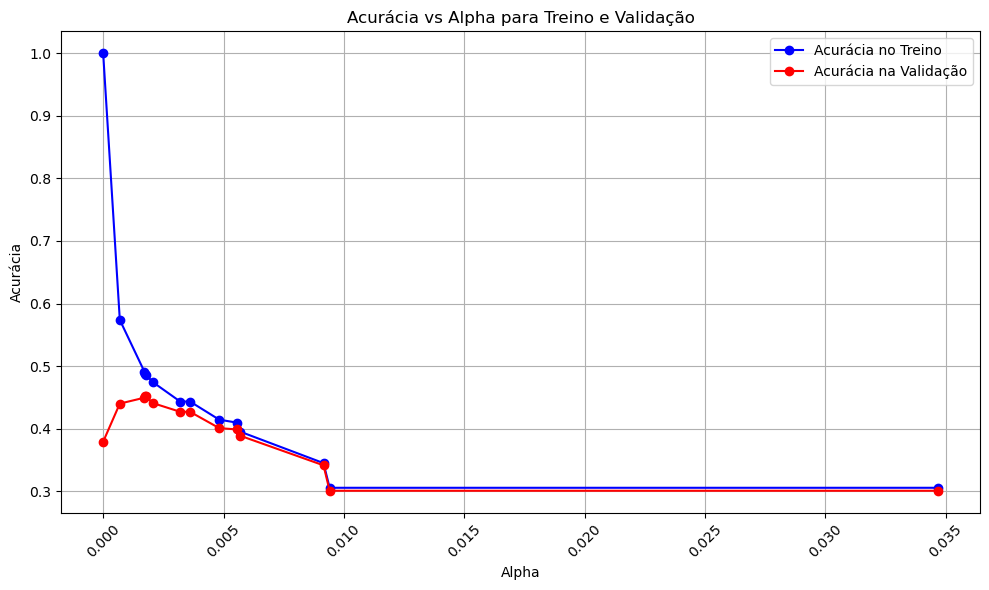

CPU times: total: 453 ms
Wall time: 554 ms


In [21]:
%%time
# Treinamento de árvores de decisão com diferentes valores de alpha
clfs = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train[top_vars], y_train) for alpha in ccp_alphas]

# Avaliação e plotagem da acurácia
train_scores = [clf.score(X_train[top_vars], y_train) for clf in clfs]
valid_scores = [clf.score(X_valid[top_vars], y_valid) for clf in clfs]

# Plotagem da acurácia em relação a alpha para treino e validação
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Acurácia no Treino', linestyle='-', color='b')
plt.plot(ccp_alphas, valid_scores, marker='o', label='Acurácia na Validação', linestyle='-', color='r')
plt.xlabel('Alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs Alpha para Treino e Validação')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificação da melhor árvore
best_tree_index = np.argmax(valid_scores)
best_tree = clfs[best_tree_index]

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

+-----------------------+--------+
|        Métrica        | Valor  |
+-----------------------+--------+
| Acurácia na Validação | 45.25% |
|   Acurácia no Teste   | 44.45% |
+-----------------------+--------+


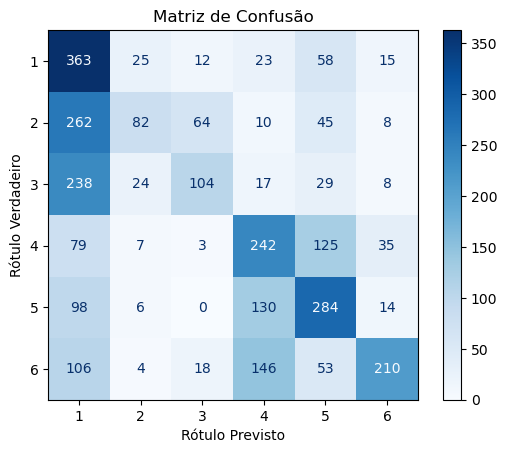

CPU times: total: 188 ms
Wall time: 277 ms


In [23]:
%%time
# Exibindo a acurácia da melhor árvore no conjunto de validação e teste
acuracia_validacao = valid_scores[best_tree_index]
acuracia_teste = accuracy_test

# Criando uma tabela para exibir as métricas
table = PrettyTable()
table.field_names = ["Métrica", "Valor"]
table.add_row(["Acurácia na Validação", f"{acuracia_validacao * 100:.2f}%"])
table.add_row(["Acurácia no Teste", f"{acuracia_teste * 100:.2f}%"])

# Exibindo a tabela
print(table)

# Exibindo a matriz de confusão para a melhor árvore no conjunto de teste
cm = confusion_matrix(y_test, best_tree.predict(X_test[top_vars]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".0f", xticks_rotation='horizontal')
plt.title('Matriz de Confusão')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

# Atividade 03

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Configurando visualizações
%matplotlib inline

In [26]:
%%time
# Carregando os dados de treino e teste
X_train = pd.read_csv('X_train.csv', index_col='Unnamed: 0')[['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z']]
y_train = pd.read_csv('y_train.txt', header=None).squeeze()
X_test = pd.read_csv('X_test.csv', index_col='Unnamed: 0')[['1 tBodyAcc-mean()-X', '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z']]
y_test = pd.read_csv('y_test.txt', header=None).squeeze()

# Criando uma tabela para exibir os formatos dos conjuntos de dados
table = PrettyTable()
table.field_names = ["Conjunto de Dados", "Formato"]
table.add_row(["Treino", X_train.shape])
table.add_row(["Teste", X_test.shape])

# Exibindo a tabela
print(table)

+-------------------+-----------+
| Conjunto de Dados |  Formato  |
+-------------------+-----------+
|       Treino      | (7352, 3) |
|       Teste       | (2947, 3) |
+-------------------+-----------+
CPU times: total: 0 ns
Wall time: 19.9 ms


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

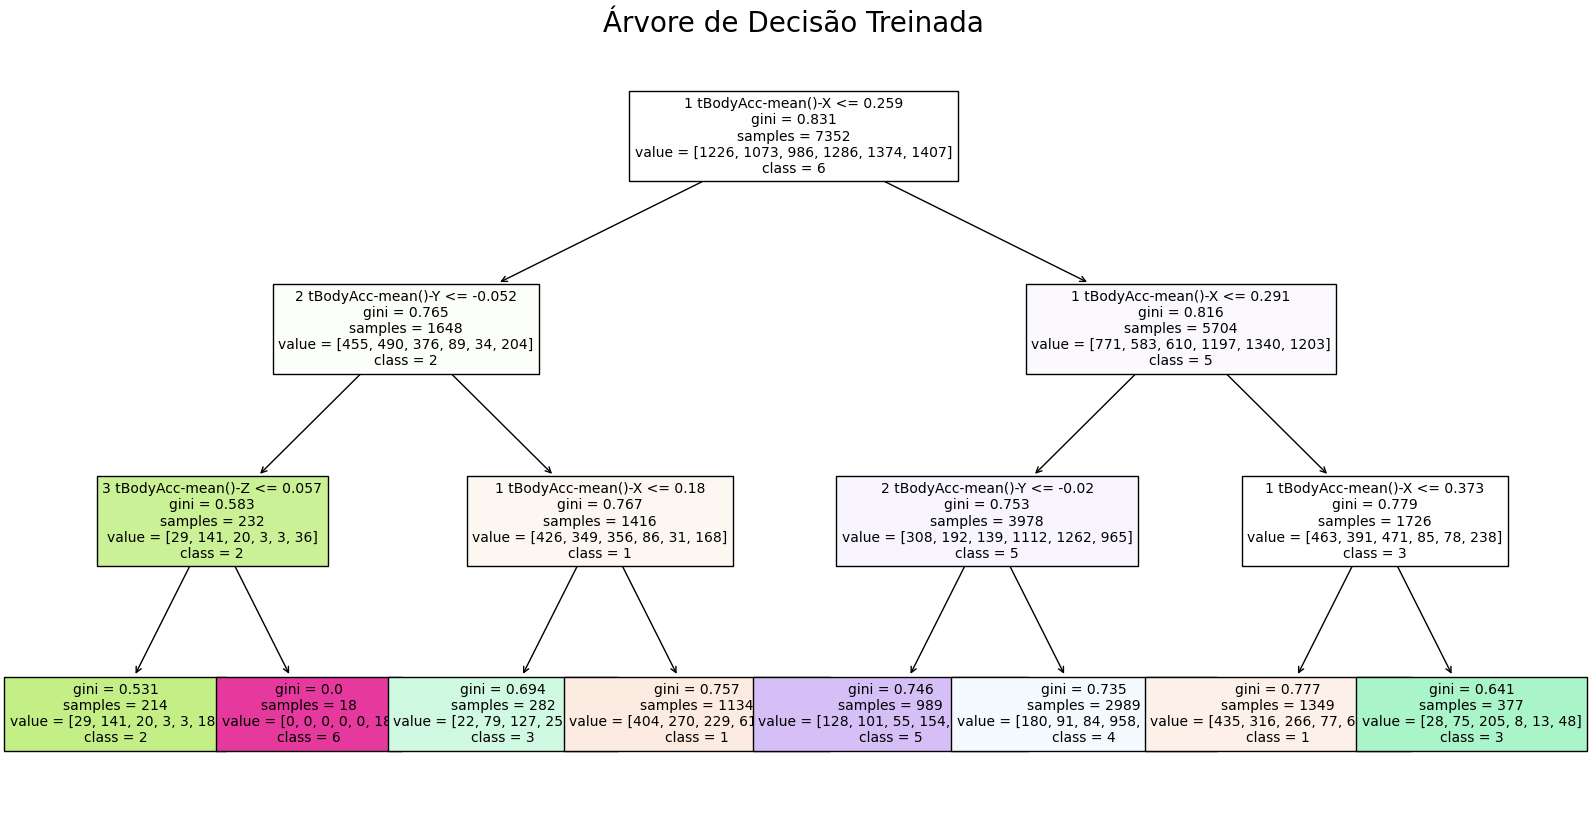

CPU times: total: 500 ms
Wall time: 831 ms


In [28]:
%%time
# Inicializando a árvore de decisão com parâmetros adequados
arvore_classificadora = DecisionTreeClassifier(random_state=42, max_depth=3)

# Treinando a árvore de decisão
arvore_treinada = arvore_classificadora.fit(X_train, y_train)

# Configurando o tamanho da figura e plotando a árvore
plt.figure(figsize=(20, 10))
plot_tree(arvore_treinada, filled=True, feature_names=feature_names_list, class_names=list(map(str, arvore_treinada.classes_)), fontsize=10)
plt.title("Árvore de Decisão Treinada", fontsize=20)
plt.savefig("decision_tree.png")
plt.show()

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [29]:
%%time
# Função para treinar e avaliar a árvore de decisão
def treinar_e_avaliar_arvore(X_train, y_train, X_test, y_test, ccp_alphas):
    # Inicializando o classificador de árvore de decisão com parâmetros adequados
    clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
    
    # Configurando o grid de parâmetros para busca
    grid = GridSearchCV(estimator=clf, param_grid={'ccp_alpha': ccp_alphas[::10]}, cv=10, verbose=1)
    
    # Executando a busca pelos melhores parâmetros
    grid.fit(X_train, y_train)
    
    # Organizando os resultados e identificando o melhor ccp_alpha
    resultados_df = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')
    melhor_ccp = resultados_df.iloc[grid.best_index_]['param_ccp_alpha']
    
    # Criando a tabela de resultados
    table = PrettyTable()
    table.field_names = ["Rank", "Mean Test Score", "CCP Alpha"]
    for i, row in resultados_df.iterrows():
        table.add_row([row['rank_test_score'], row['mean_test_score'], row['param_ccp_alpha']])
    
    # Imprimindo a tabela de resultados
    print("Resultados da Busca de Hiperparâmetros:")
    print(table)
    
    return melhor_ccp

# Treinando e avaliando a árvore de decisão
melhor_ccp_1 = treinar_e_avaliar_arvore(X_train, y_train, X_test, y_test, ccp_alphas)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Resultados da Busca de Hiperparâmetros:
+------+--------------------+-----------+
| Rank |  Mean Test Score   | CCP Alpha |
+------+--------------------+-----------+
|  1   | 0.4451887385388938 |    0.0    |
+------+--------------------+-----------+
CPU times: total: 109 ms
Wall time: 323 ms


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia da árvore no conjunto de teste: 0.3698676620291822


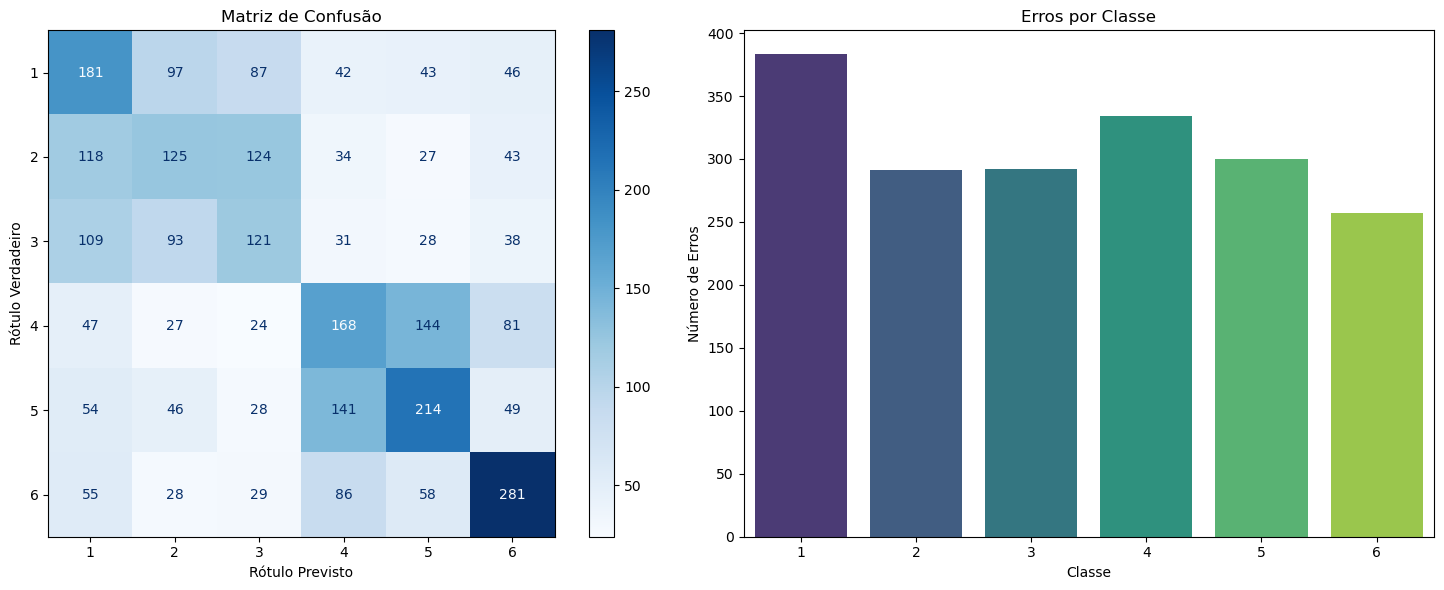

Erros por Classe:
+--------+---------+-------+
| Classe | Acertos | Erros |
+--------+---------+-------+
|   1    |   181   |  383  |
|   4    |   168   |  334  |
|   5    |   214   |  300  |
|   3    |   121   |  292  |
|   2    |   125   |  291  |
|   6    |   281   |  257  |
+--------+---------+-------+
CPU times: total: 234 ms
Wall time: 386 ms


In [32]:
%%time
# Treinar outra árvore de decisão para uma classe específica
clf_1 = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp_1).fit(X_train, y_train)

# Avaliar a acurácia da árvore no conjunto de teste
acuracia = accuracy_score(y_test, clf_1.predict(X_test))
print('Acurácia da árvore no conjunto de teste:', acuracia)

# Exibir a matriz de confusão e erros por classe
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de Confusão
matriz_confusao_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=clf_1.classes_)
matriz_confusao_display.plot(cmap=plt.cm.Blues, values_format=".0f", xticks_rotation='horizontal', ax=axs[0])
axs[0].set_title('Matriz de Confusão')
axs[0].set_xlabel('Rótulo Previsto')
axs[0].set_ylabel('Rótulo Verdadeiro')

# Erros por Classe
sns.barplot(x='classe', y='erros', data=resultados_df_1.reset_index(), palette='viridis', ax=axs[1])
axs[1].set_title('Erros por Classe')
axs[1].set_xlabel('Classe')
axs[1].set_ylabel('Número de Erros')

plt.tight_layout()
plt.show()

# Exibir informações sobre os erros por classe usando PrettyTable
erros_table = PrettyTable()
erros_table.field_names = ['Classe', 'Acertos', 'Erros']
for i, row in resultados_df_1.iterrows():
    erros_table.add_row([i, row['acertos'], row['erros']])
print("Erros por Classe:")
print(erros_table)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Fitting 10 folds for each of 31 candidates, totalling 310 fits
Resultados da Busca de Hiperparâmetros:
+------+--------------------+------------------------+
| Rank |  Mean Test Score   |       CCP Alpha        |
+------+--------------------+------------------------+
|  1   | 0.8412671916592724 | 0.0012754476116503977  |
|  2   | 0.840455486542443  | 0.00016120581953008516 |
|  3   | 0.8403194321206744 | 0.00017002176278563657 |
|  4   | 0.840047323277137  | 0.00015471980413492927 |
|  5   | 0.8399114537119197 | 0.00012001536196633167 |
|  5   | 0.8399114537119197 | 0.00017856644624870965 |
|  7   | 0.8399114537119194 | 0.00012751632208922743 |
|  7   | 0.8399114537119194 | 0.00013010360978379148 |
|  7   | 0.8399114537119194 | 0.00013189567052461495 |
|  7   | 0.8399114537119194 | 0.0001348839318099386  |
|  7   | 0.8399114537119194 | 0.00013946345489897812 |
|  12  | 0.8396393448683822 | 0.0001879513304975764  |
|  13  | 0.8396393448683821 | 0.0001987149593243173  |
|  14  | 0.839498

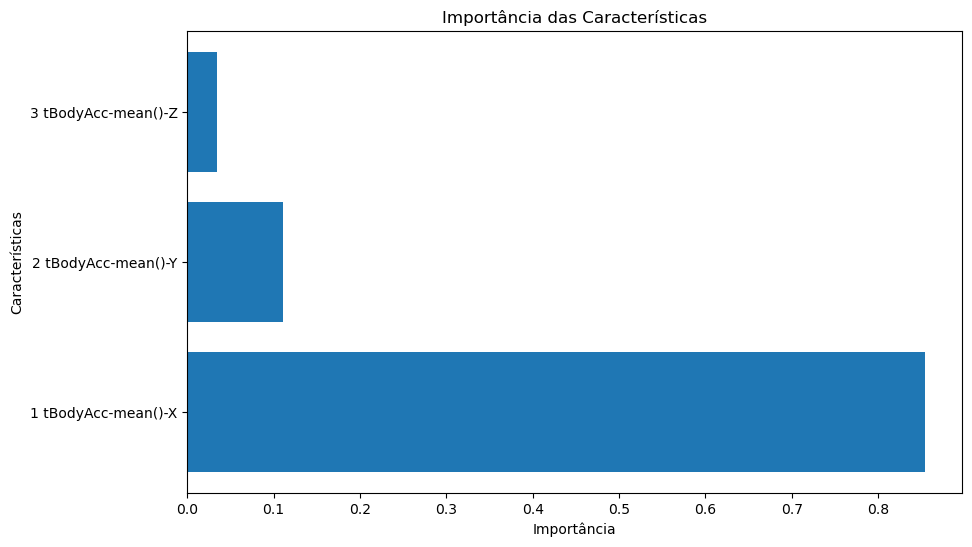

CPU times: total: 7.8 s
Wall time: 9.85 s


In [33]:
%%time
from prettytable import PrettyTable

# Função para treinar uma árvore de decisão para uma classe específica
def treinar_arvore(X_train, y_train, min_samples_leaf=20, max_depth=4, random_state=42):
    return DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=random_state).fit(X_train, y_train)

# Treinar uma árvore de decisão para uma classe difícil
clf_2 = treinar_arvore(X_train=X_train, y_train=y_train)
classe_dificil = 5  # Substituir pelo número da classe difícil
nova_variavel = f'Classe_{classe_dificil}_Dificil'
y_train_dificil = (y_train == classe_dificil).astype(int)
y_test_dificil = (y_test == classe_dificil).astype(int)
clf_dificil = treinar_arvore(X_train=X_train, y_train=y_train_dificil)

# Analisar a importância das características para a classe difícil
importancias_dificil = pd.Series(clf_dificil.feature_importances_, index=X_train.columns)
cols_dificil = importancias_dificil.nlargest(3).index

# Combinar colunas selecionadas
cols_2_dificil = list(X_train.columns) + cols_dificil.tolist()
X_train_2_dificil, X_test_2_dificil = X_train[cols_2_dificil], X_test[cols_2_dificil]

# Treinar e avaliar a árvore de decisão para a classe difícil
caminho_2_dificil = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X=X_train_2_dificil, y=y_train_dificil)
ccp_alphas_2_dificil = np.unique(caminho_2_dificil.ccp_alphas[caminho_2_dificil.ccp_alphas >= 0])
melhor_ccp_2_dificil = treinar_e_avaliar_arvore(X_train_2_dificil, y_train_dificil, X_test_2_dificil, y_test_dificil, ccp_alphas_2_dificil)

# Criar um PrettyTable para melhor visualização dos resultados
resultados_table = PrettyTable()
resultados_table.field_names = ['Top 3 características', 'X_train_2', 'X_test_2', 'Melhor ccp_alpha']
resultados_table.add_row([', '.join(cols_dificil), ', '.join(X_train_2_dificil.columns), ', '.join(X_test_2_dificil.columns), melhor_ccp_2_dificil])
print("Resultados para a classe difícil:")
print(resultados_table)

# Visualizar a importância das características para a classe difícil
def visualizar_importancia(features, importancias, top_n=3):
    plt.figure(figsize=(10, 6))
    plt.barh(features, importancias.nlargest(top_n))
    plt.title('Importância das Características')
    plt.xlabel('Importância')
    plt.ylabel('Características')
    plt.show()

visualizar_importancia(cols_dificil, importancias_dificil)